In [1]:
from mundilib import MundiCatalogue
from utils import height2width
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Init wms
c = MundiCatalogue()
wms = c.get_collection("Sentinel1").mundi_wms('GRD')

In [2]:
_projection_ = 'EPSG:4326'
_bbox_       = (15.68727199494822, 44.6026039846487, 16.10475246369822, 44.8003578908987)
_time_       = '2022-05-06/2023-05-10'
_height_     = 512
_width_      = height2width(_bbox_, _height_)

In [5]:
layers = list(wms.contents)
for lay in layers:
    print (wms[lay].name + " i.e. " + "'" + wms[lay].title + "'")

IW_VH-LINEAR-SIGMA0 i.e. 'IW - VH [linear sigma0]'
IW_VV-LINEAR-SIGMA0 i.e. 'IW - VV [linear sigma0]'
IW_VV i.e. 'IW - VV [linear gamma0]'
IW_VV_DB i.e. 'IW - VV [dB gamma0]'
IW-SV-LINEAR-GAMMA0 i.e. 'IW - SV [linear gamma0]'
IW-SV-DB-GAMMA0 i.e. 'IW - SV [dB gamma0]'
IW_VH i.e. 'IW - VH [linear gamma0]'
IW-VH-DB i.e. 'IW - VH [dB gamma0]'
EW-HH-LINEAR-GAMMA0 i.e. 'EW - HH [linear gamma0]'
EW-HH-DB-GAMMA0 i.e. 'EW - HH [dB gamma0]'
EW-SH-LINEAR-GAMMA0 i.e. 'EW - SH [linear gamma0]'
EW_HV i.e. 'EW - HV [linear gamma0]'
EW-SH-DB-GAMMA0 i.e. 'EW - SH [dB gamma0]'
EW_HV_DB i.e. 'EW - HV [dB gamma0]'


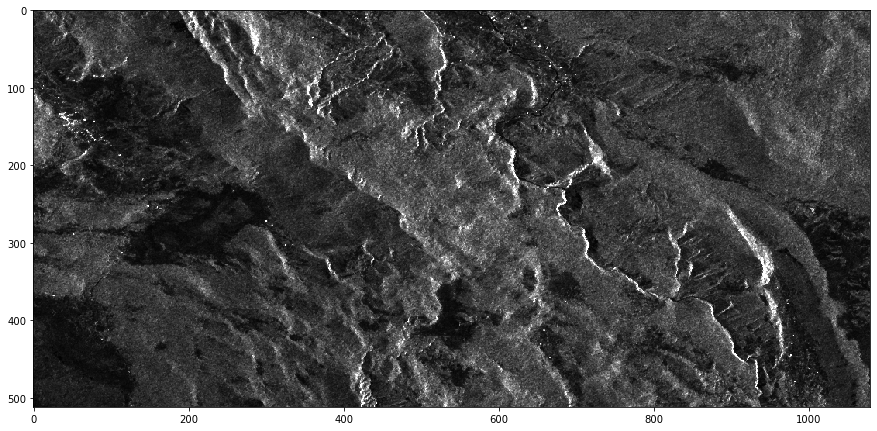

In [10]:
img_tc = wms.getmap(layers=[layers[1]],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

grid = np.asarray(Image.open(img_tc))
grid = grid[:,:,0] / grid[:,:,1]

plt.figure(figsize=(15, 15))
plt.imshow(grid, cmap='gray')
plt.show()